Setting up to test each column in the DataFrame for a unit root using the Augmented Dickey Fuller test

In [23]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Start by loading the data
file_path = '/Users/asger/Documents/GitHub/Deep_Learning_Techniques/Master/Data/macrovariables_featured.csv'

df = pd.read_csv(file_path)

# Dropping the date column
df = df.drop(columns=['date'])

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()

,usd_eur_exchange,brent,eu_cpi,eu_mro_rate,eu_unemployment_rate,eu_yield_3m,eu_yield_10y,eu_yield_30y,eur_stoxx_vix,eur_stoxx,us_cpi,us_federal_fund_rate,us_sp500,us_sp500_vix,us_treasury_yield_3m,us_treasury_yield_10y,us_treasury_yield_30y,us_unemployment
0,0.232023,0.234592,0.258929,0.444444,0.431034,0.568152,0.801842,0.872198,0.049873,0.422603,0.598277,0.411546,0.123828,0.065806,0.413854,0.795359,0.899083,0.175439
1,0.402685,0.236446,0.258929,0.444444,0.431034,0.569855,0.806786,0.874669,0.048645,0.413894,0.598277,0.411546,0.121826,0.067301,0.413854,0.795359,0.892202,0.175439
2,0.304890,0.253134,0.258929,0.444444,0.431034,0.569028,0.799022,0.865554,0.040650,0.420827,0.598277,0.411546,0.123291,0.060367,0.410302,0.795359,0.894495,0.175439
3,0.285714,0.253356,0.258929,0.444444,0.431034,0.566650,0.793399,0.860001,0.037647,0.425769,0.598277,0.409683,0.122876,0.059143,0.412078,0.795359,0.892202,0.175439
4,0.450623,0.263962,0.258929,0.444444,0.431034,0.564154,0.793394,0.858897,0.029165,0.424820,0.598277,0.413408,0.124243,0.055608,0.419183,0.795359,0.887615,0.175439


In [28]:
# Current eu_cpi is calculated as the difference between the curennt months cpi and last year same months cpi, instead we transform it to month to month change
df['eu_cpi'] = df['eu_cpi'].diff()

<Axes: >

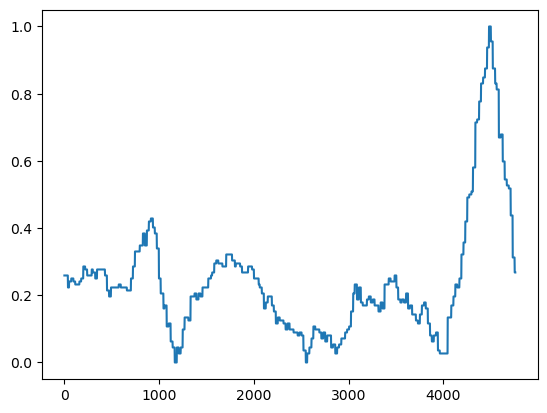

In [32]:
df['eu_cpi'].plot()

<Axes: >

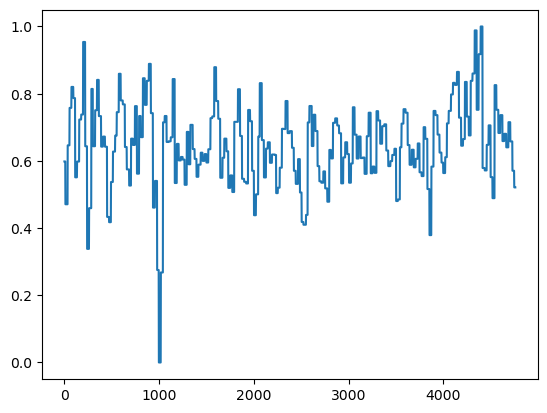

In [27]:
# Plotting eu_cpi
df['us_cpi'].plot()

In [25]:
# Lets set up a for loop that rolls through each column except the date column, testing for a unit root using the statsmodel adfuller test

def check_stationarity(df):
    for column in df.columns:
        result = adfuller(df[column], autolag = 'AIC')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value}')
        print(f'Number of lags used: {result[2]}')
        print(f'Is {column} stationary? {"Yes" if result[1] < 0.05 else "No"}')
        print('\n')

check_stationarity(df)

ADF Statistic: -67.98816439717042
p-value: 0.0
Critical Values:
	1%: -3.43172512220716
	5%: -2.862147648515838
	10%: -2.567093453210195
Number of lags used: 0
Is usd_eur_exchange stationary? Yes


ADF Statistic: -2.947210643661034
p-value: 0.04012705981785537
Critical Values:
	1%: -3.431733559555839
	5%: -2.862151376002777
	10%: -2.567095437512054
Number of lags used: 29
Is brent stationary? Yes


ADF Statistic: -1.8159882305750918
p-value: 0.37255336709684733
Critical Values:
	1%: -3.43173238963315
	5%: -2.8621508591501033
	10%: -2.5670951623690046
Number of lags used: 25
Is eu_cpi stationary? No


ADF Statistic: -0.026072129023169004
p-value: 0.9563220914475706
Critical Values:
	1%: -3.4317344382982022
	5%: -2.8621517642166197
	10%: -2.567095644175108
Number of lags used: 32
Is eu_mro_rate stationary? No


ADF Statistic: 0.005565309046718108
p-value: 0.9589899204178041
Critical Values:
	1%: -3.4317318054134476
	5%: -2.8621506010513356
	10%: -2.5670950249718727
Number of lags used: 23

In [20]:
# now taking the difference of the data to make it stationary excluding the first column which is the date column
df_diff = df.diff().dropna()


check_stationarity(df_diff)


ADF Statistic: -20.758923019697367
p-value: 0.0
Critical Values:
	1%: -3.4317344382982022
	5%: -2.8621517642166197
	10%: -2.567095644175108
Number of lags used: 31
Is usd_eur_exchange stationary? Yes


ADF Statistic: -11.169972420635851
p-value: 2.6555068632988896e-20
Critical Values:
	1%: -3.431733559555839
	5%: -2.862151376002777
	10%: -2.567095437512054
Number of lags used: 28
Is brent stationary? Yes


ADF Statistic: -10.445161926785861
p-value: 1.486677801770791e-18
Critical Values:
	1%: -3.43173238963315
	5%: -2.8621508591501033
	10%: -2.5670951623690046
Number of lags used: 24
Is eu_cpi stationary? Yes


ADF Statistic: -8.233248404923431
p-value: 5.983948418622549e-13
Critical Values:
	1%: -3.431734731460428
	5%: -2.8621518937308172
	10%: -2.5670957131211334
Number of lags used: 32
Is eu_mro_rate stationary? Yes


ADF Statistic: -10.60185406394553
p-value: 6.142086416256715e-19
Critical Values:
	1%: -3.4317318054134476
	5%: -2.8621506010513356
	10%: -2.5670950249718727
Number of